In [31]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [33]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [34]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

## Initialize Configs

In [35]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_poor_income_10K'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = 'bb0bc555-b76f-4104-b5d6-3a2bc6db2b38'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [36]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [37]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [38]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(38, 33)

In [39]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.782001,1.000000,0.000000,0.834667,1.000000,0.000000,0.752585,1.000000,0.000000,0.792600
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.731257,1.000000,0.000000,0.751781,1.000000,0.000000,0.722491,1.000000,0.000000,0.736880
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.658403,0.604900,0.850330,0.625185,0.578928,0.858707,0.671465,0.615167,0.842712,0.648903
3,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.689141,0.635366,0.835467,0.672383,0.617574,0.838385,0.691010,0.637383,0.830627,0.681859
4,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.606233,1.000000,0.000000,0.568060,1.000000,0.000000,0.621493,1.000000,0.000000,0.602377
5,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.676627,1.000000,0.000000,0.633219,1.000000,0.000000,0.697674,1.000000,0.000000,0.670870
6,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.474947,0.000000,1.000000,0.488417,0.000000,1.000000,0.469959,0.000000,1.000000,0.476333
7,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.438866,0.000000,1.000000,0.478472,0.000000,1.000000,0.418464,0.000000,1.000000,0.443594
8,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.097298,0.000000,1.000000,0.078145,0.000000,1.000000,0.109143,0.000000,1.000000,0.092143
9,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.097900,0.000000,1.000000,0.087655,0.000000,1.000000,0.104803,0.000000,1.000000,0.095222


In [40]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [41]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.782001,1.000000,0.000000,0.834667,1.000000,0.000000,0.752585,1.000000,0.000000,0.792600
2,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.658403,0.604900,0.850330,0.625185,0.578928,0.858707,0.671465,0.615167,0.842712,0.648903
4,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.606233,1.000000,0.000000,0.568060,1.000000,0.000000,0.621493,1.000000,0.000000,0.602377
6,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.474947,0.000000,1.000000,0.488417,0.000000,1.000000,0.469959,0.000000,1.000000,0.476333
8,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.097298,0.000000,1.000000,0.078145,0.000000,1.000000,0.109143,0.000000,1.000000,0.092143
10,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.039032,0.035828,0.050525,0.036737,0.033882,0.051154,0.040193,0.036825,0.050438,0.038508
12,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.095297,0.062302,0.213658,0.074872,0.047923,0.210918,0.106537,0.071817,0.212145,0.091100
14,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.904703,0.937698,0.786342,0.925128,0.952077,0.789082,0.893463,0.928183,0.787855,0.908900
16,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.690941,0.718411,0.592403,0.735005,0.767048,0.573242,0.667283,0.688179,0.603724,0.700298
18,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,0,OK,2023-10-18 11:53:36.874,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.670709,0.616411,0.865488,0.636922,0.589952,0.874041,0.684003,0.626830,0.857911,0.661051


In [42]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][1].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.731257,1.000000,0.000000,0.751781,1.000000,0.000000,0.722491,1.000000,0.000000,0.736880
3,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.689141,0.635366,0.835467,0.672383,0.617574,0.838385,0.691010,0.637383,0.830627,0.681859
5,F1,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.676627,1.000000,0.000000,0.633219,1.000000,0.000000,0.697674,1.000000,0.000000,0.670870
7,FNR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.438866,0.000000,1.000000,0.478472,0.000000,1.000000,0.418464,0.000000,1.000000,0.443594
9,FPR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.097900,0.000000,1.000000,0.087655,0.000000,1.000000,0.104803,0.000000,1.000000,0.095222
11,IQR,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.039154,0.036147,0.047336,0.037955,0.034723,0.047745,0.039307,0.036446,0.046757,0.038643
13,Jitter,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.101990,0.076260,0.172003,0.096934,0.069371,0.180417,0.102056,0.077130,0.166950,0.099540
15,Label_Stability,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.898010,0.923740,0.827997,0.903066,0.930629,0.819583,0.897944,0.922870,0.833050,0.900460
17,Mean,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.630909,0.630800,0.631205,0.673495,0.688868,0.626935,0.609063,0.599256,0.634596,0.640716
19,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,2,1,OK,2023-10-18 11:53:36.879,bb0bc555-b76f-4104-b5d6-3a2bc6db2b38,Exp_iter_1,...,0.700535,0.646156,0.848501,0.683500,0.627972,0.851675,0.702391,0.648254,0.843337,0.693111


In [43]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [44]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.018458,-0.092462,-0.025053,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.030997,-0.026304,-0.037319,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.018458,0.092462,0.025053,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.135263,0.992606,1.160093,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.095456,-0.005467,0.117217,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.082081,0.049131,0.093551,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,1.035441,1.034814,1.040947,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.003456,-0.004439,-0.004620,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.004887,-0.006278,-0.006534,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.914020,0.887461,0.881631,RandomForestClassifier,Exp_iter_1,0.7,0


In [45]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,-0.018458,-0.092462,-0.025053,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.030997,-0.026304,-0.037319,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,0.018458,0.092462,0.025053,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.135263,0.992606,1.160093,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.095456,-0.005467,0.117217,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [46]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [47]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

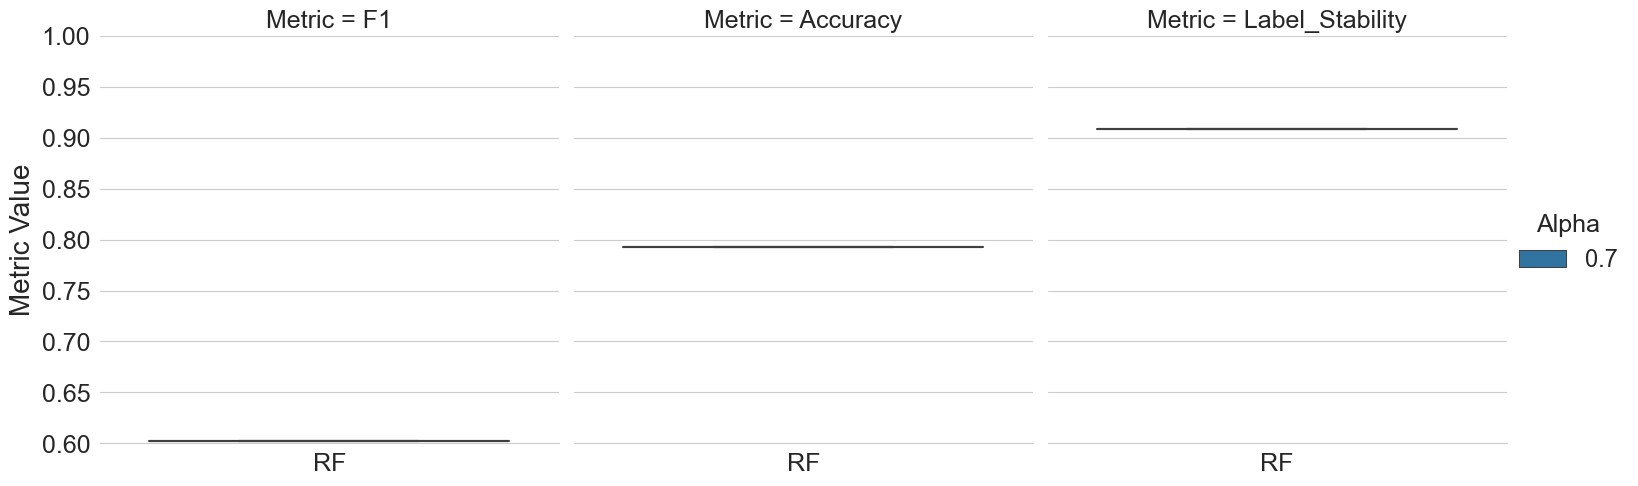

In [48]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

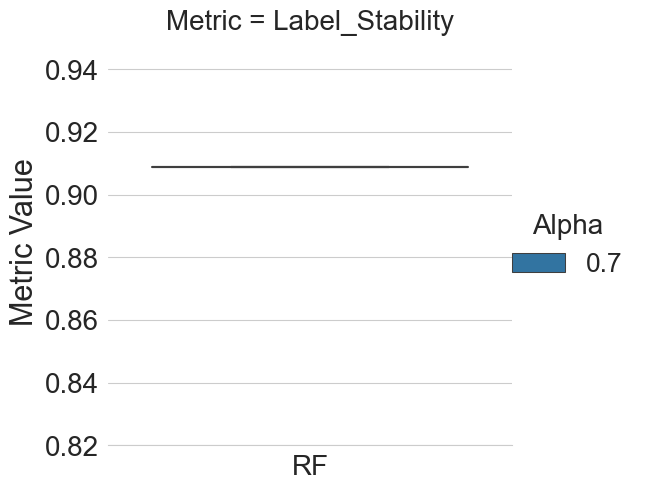

In [49]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

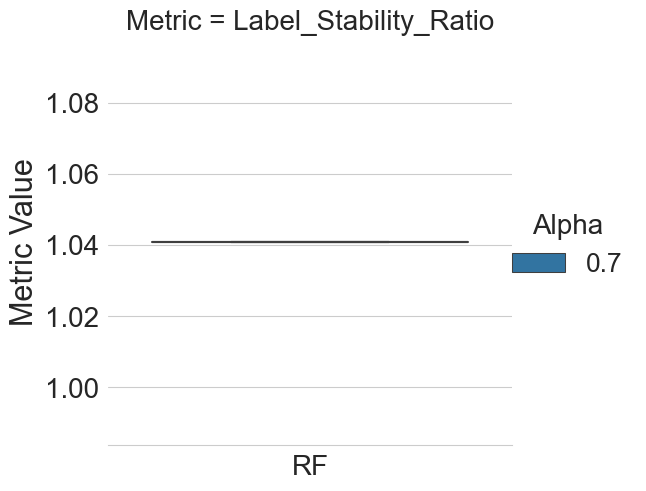

In [50]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

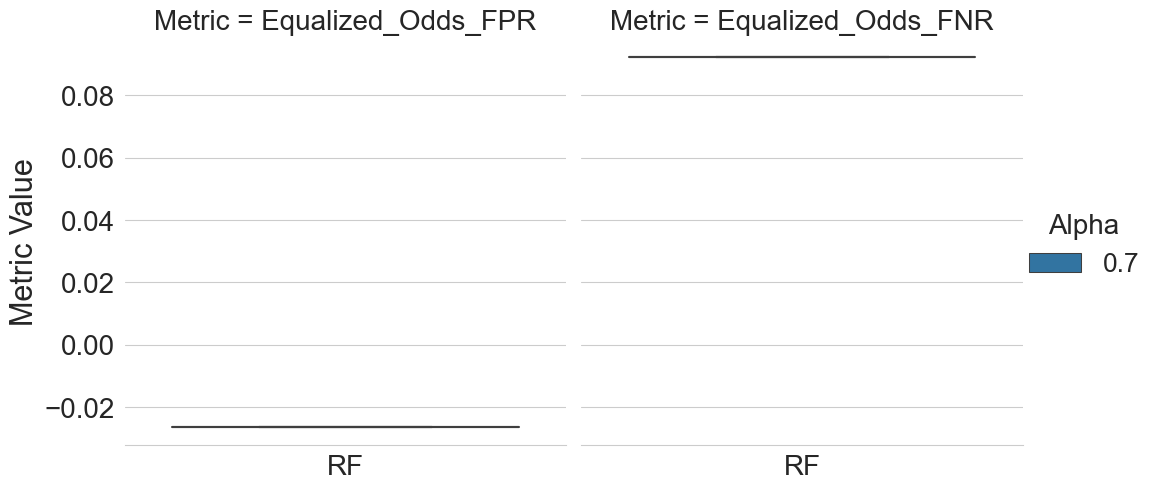

In [51]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [52]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Poor set',
    1: 'Rich set',
}

<Figure size 1200x600 with 0 Axes>

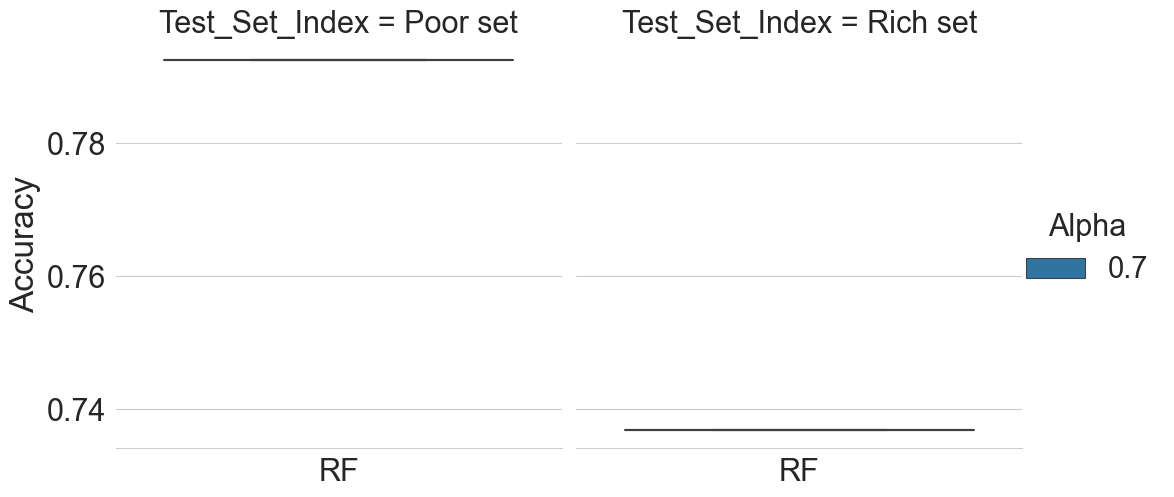

In [53]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

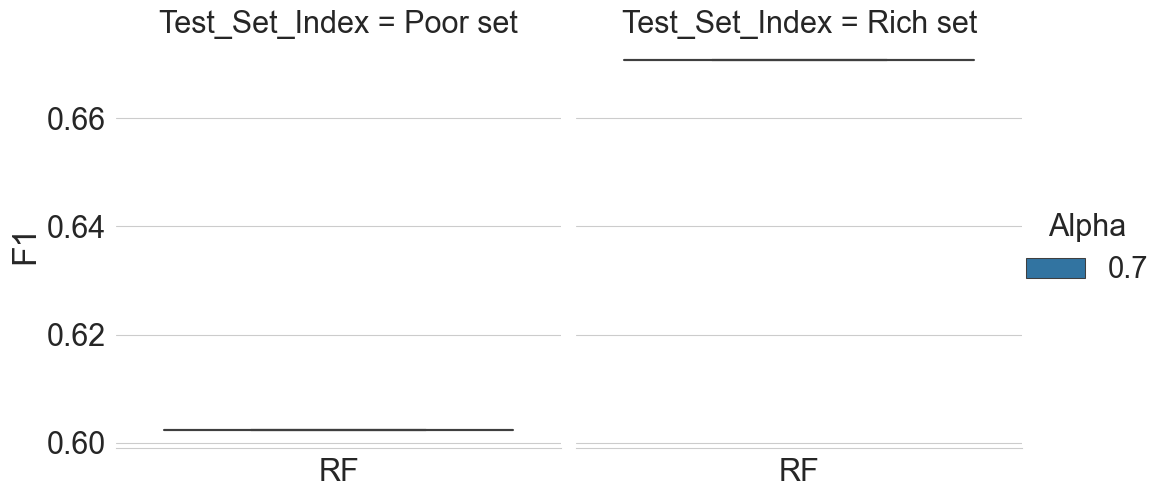

In [54]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

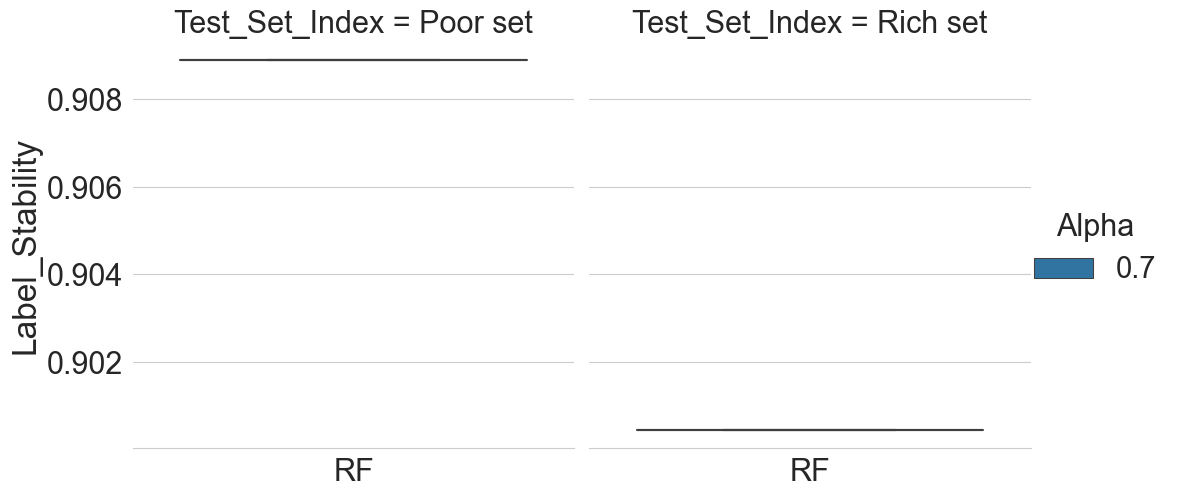

In [55]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

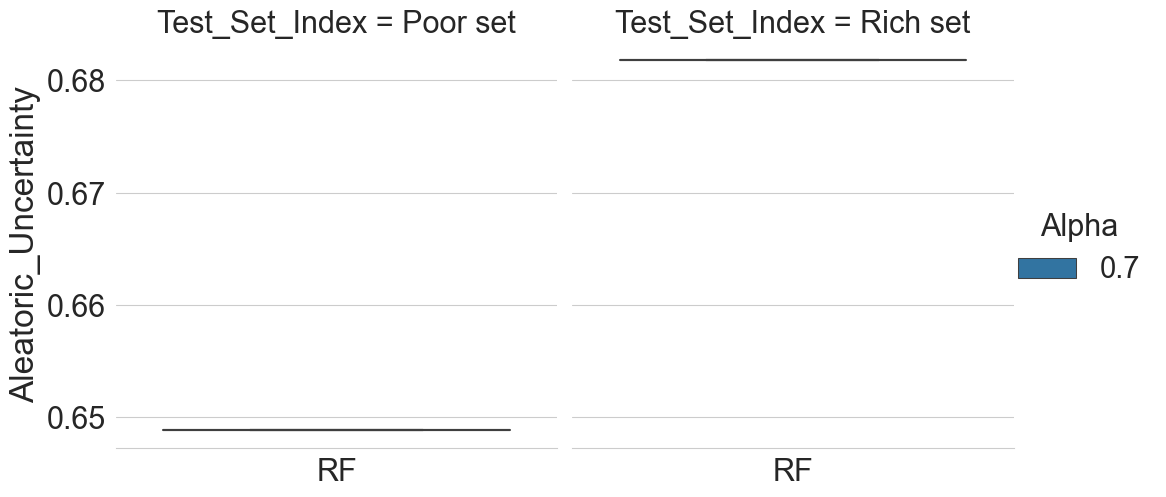

In [56]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

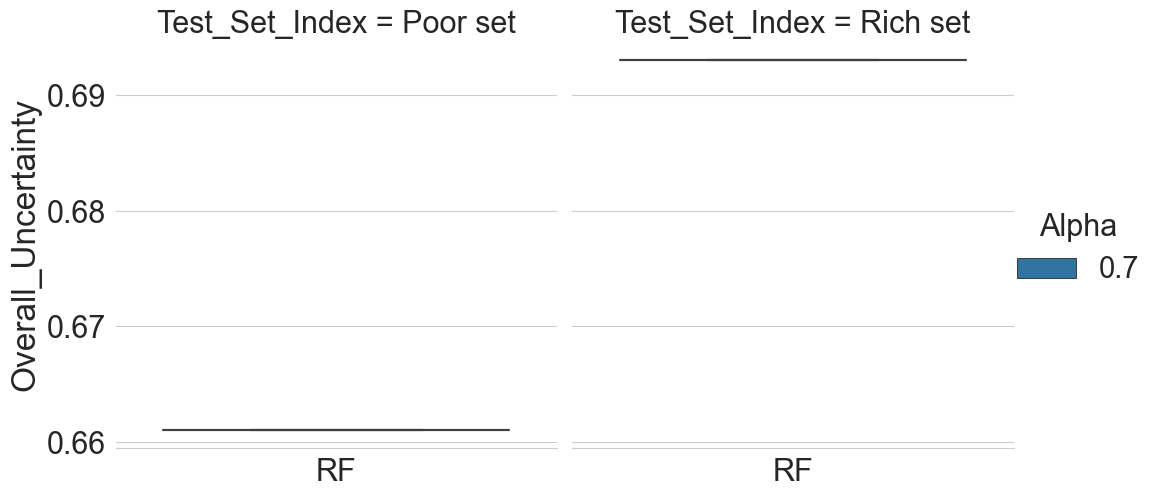

In [57]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

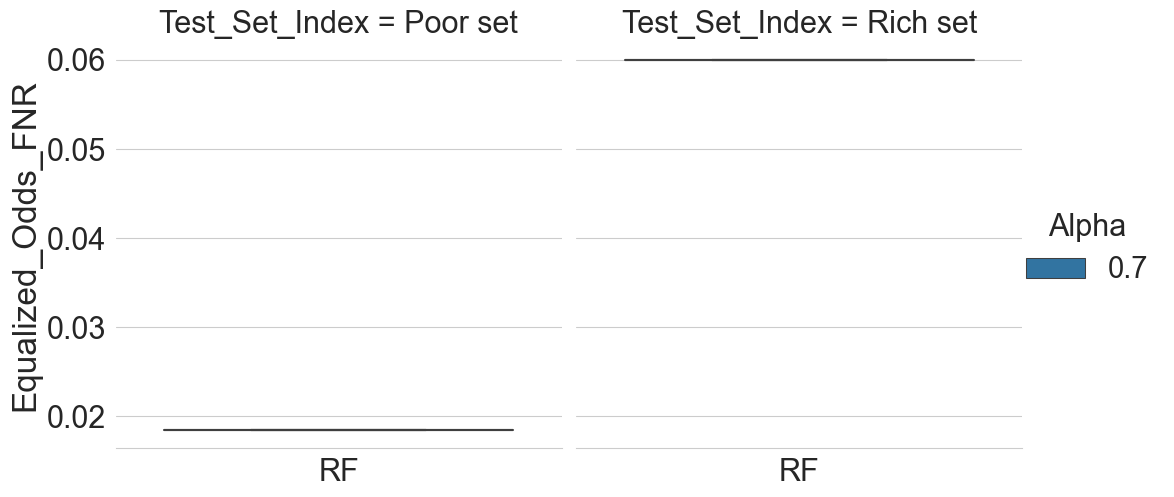

In [58]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

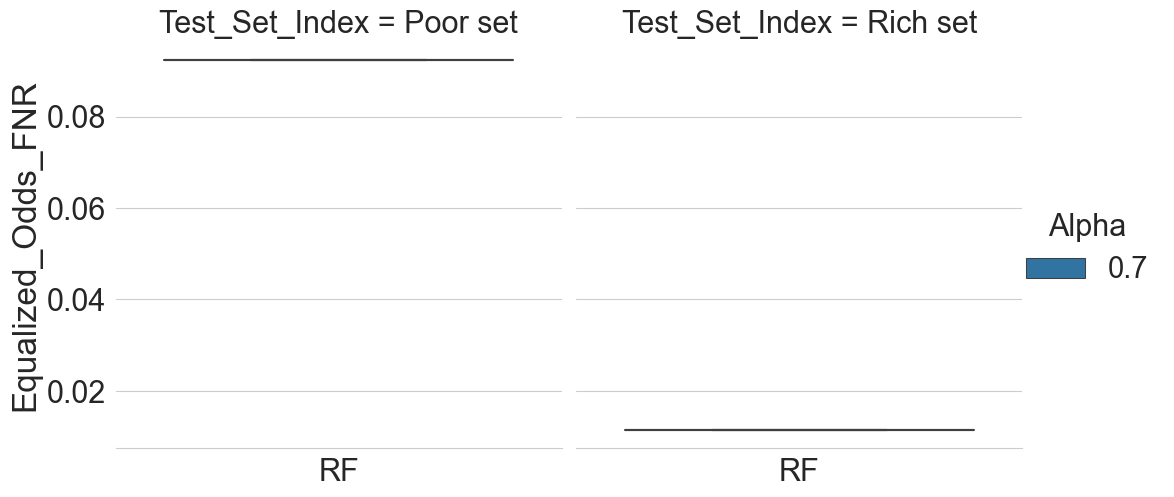

In [59]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 1200x600 with 0 Axes>

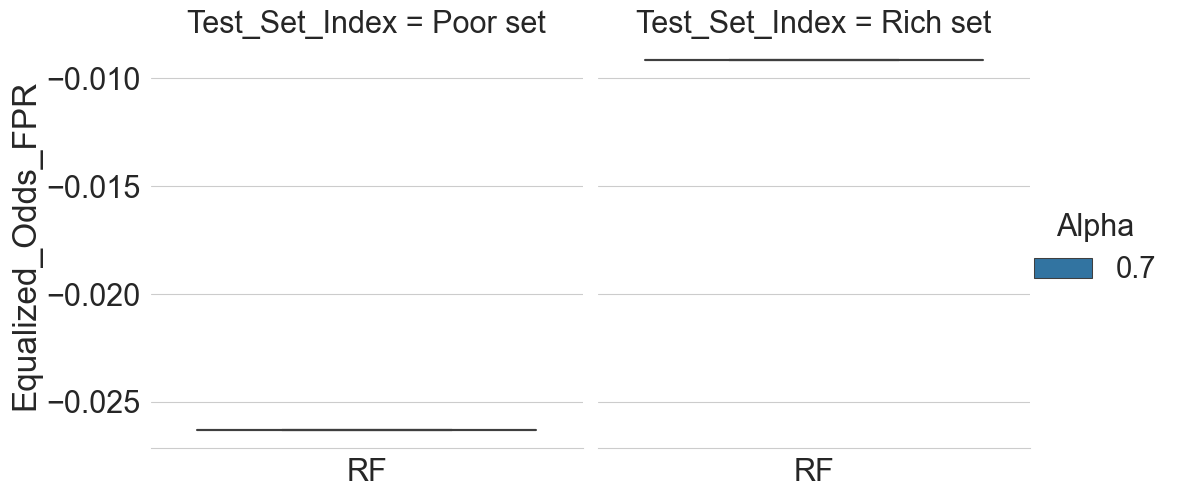

In [60]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)